# Pytorch
- 구글의 tensorflow와 유사한 딥러닝 라이브러리
- 페이스북 인공지능 연구팀에 의해 주로 개발
- torch
    - 텐서 변환및 다양한 수학 함수와 클래스가 포함 되어 있다.
- torch.nn
    - 신경망을 구축하기 위한 레이어(층), 활성화 함수, 손실함수등 에대한 함수와 클래스가 포함 되어 있다.
- torch.utils.data
    - 미니 배치 학습을 위한 데이터셋 구성관련 함수와 클래스가 포함 되어 있다.
- torch.optim
    - optimizer 관련 함수와 클래스가 포함 되어 있다.
- https://pytorch.org/

# 타이타닉 데이터셋을 딥러닝 학습 시켜보기
1. 데이터 전처리
2. 미니배치 단위 학습을 위해 데이터셋 클래스 구현
3. 딥러닝 모델 인공신경망 구현
4. 하이퍼파라미터 정의(손실함수및 옵티마이저 선택등.)
5. 학습 및 테스트 loop 구현

## 데이터 전처리

In [1]:
import torch
import numpy as np
import pandas as pd

- 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# 코랩일 경우

- 데이터 경로 변수

In [3]:
# DATA_PATH = "/content/drive/MyDrive/data/"
# DATA_PATH
# 코랩일 경우
# train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
# test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
# train.shape , test.shape

In [4]:
# 절대 경로 윈도우
absolute_path = "C:\\PapersWithCode\\03_Deep_Learning\\data\\titanic_train.csv"

# 절대 경로를 이용해 데이터 읽기
df_absolute = pd.read_csv(absolute_path)
print("Data from absolute path:")
print(df_absolute.head())


Data from absolute path:
   passengerid  survived  pclass                      name  gender   age  \
0          494         0       1   Artagaveytia, Mr. Ramon    male  71.0   
1          462         0       3       Morley, Mr. William    male  34.0   
2         1286         0       3  Kink-Heilmann, Mr. Anton    male  29.0   
3         1130         1       2     Hiltunen, Miss. Marta  female  18.0   
4          461         1       1       Anderson, Mr. Harry    male  48.0   

   sibsp  parch    ticket     fare cabin embarked  
0      0      0  PC 17609  49.5042   NaN        C  
1      0      0    364506   8.0500   NaN        S  
2      3      1    315153  22.0250   NaN        S  
3      1      1    250650  13.0000   NaN        S  
4      0      0     19952  26.5500   E12        S  


In [5]:
import os
DATA_PATH=os.getcwd()
# 현재 디렉토리 출력

In [6]:
os.chdir(DATA_PATH) # 폴더의 위치 이동
from glob import glob
csv_files = glob("data/titanic_*.csv")

print(csv_files)

(test,train)=csv_files
train=pd.read_csv(train)
test=pd.read_csv(test)
train

['data\\titanic_test.csv', 'data\\titanic_train.csv']


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
911,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
912,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
913,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
914,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


- 결측치 확인하기

In [8]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            180
sibsp            0
parch            0
ticket           0
fare             0
cabin          706
embarked         0
dtype: int64

In [9]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          308
embarked         2
dtype: int64

In [10]:
import pandas as pd

# 결측값이 있는 컬럼들만 선택
null_col_train = train.columns[train.isnull().sum() > 0]
null_col_test = test.columns[test.isnull().sum() > 0]

print("Train 데이터프레임에서 결측값이 있는 컬럼:", null_col_train)
print("Test 데이터프레임에서 결측값이 있는 컬럼:", null_col_test)

# train 데이터프레임의 결측값 처리
for col in null_col_train:
    if pd.api.types.is_numeric_dtype(train[col]):  # 숫자형이면 평균으로 채우기
        mean_value = train[col].mean()
        print(f"{col} 컬럼의 평균값으로 결측값을 채웁니다: {mean_value}")
        train[col] = train[col].fillna(mean_value)
    else:  # 문자열이나 object 타입이면 최빈값으로 채우기
        mode_value = train[col].mode()[0] if not train[col].mode().empty else "Unknown"
        print(f"{col} 컬럼의 최빈값으로 결측값을 채웁니다: {mode_value}")
        train[col] = train[col].fillna(mode_value)

# test 데이터프레임의 결측값 처리
for col in null_col_test:
    if pd.api.types.is_numeric_dtype(test[col]):  # 숫자형이면 평균으로 채우기
        mean_value = test[col].mean()
        print(f"{col} 컬럼의 평균값으로 결측값을 채웁니다: {mean_value}")
        test[col] = test[col].fillna(mean_value)
    else:  # 문자열이나 object 타입이면 최빈값으로 채우기
        mode_value = test[col].mode()[0] if not test[col].mode().empty else "Unknown"
        print(f"{col} 컬럼의 최빈값으로 결측값을 채웁니다: {mode_value}")
        test[col] = test[col].fillna(mode_value)

# 결측값이 모두 처리되었는지 확인
train_null_count = train.isnull().sum().sum()
test_null_count = test.isnull().sum().sum()

print("Train 데이터프레임에서 남아있는 결측값의 개수:", train_null_count)
print("Test 데이터프레임에서 남아있는 결측값의 개수:", test_null_count)


Train 데이터프레임에서 결측값이 있는 컬럼: Index(['age', 'cabin'], dtype='object')
Test 데이터프레임에서 결측값이 있는 컬럼: Index(['age', 'fare', 'cabin', 'embarked'], dtype='object')
age 컬럼의 평균값으로 결측값을 채웁니다: 29.904891304347824
cabin 컬럼의 최빈값으로 결측값을 채웁니다: B57 B59 B63 B66
age 컬럼의 평균값으로 결측값을 채웁니다: 29.82474193548387
fare 컬럼의 평균값으로 결측값을 채웁니다: 30.647096683673468
cabin 컬럼의 최빈값으로 결측값을 채웁니다: C23 C25 C27
embarked 컬럼의 최빈값으로 결측값을 채웁니다: S
Train 데이터프레임에서 남아있는 결측값의 개수: 0
Test 데이터프레임에서 남아있는 결측값의 개수: 0


In [11]:
train.isnull().sum(),test.isnull().sum()

(passengerid    0
 survived       0
 pclass         0
 name           0
 gender         0
 age            0
 sibsp          0
 parch          0
 ticket         0
 fare           0
 cabin          0
 embarked       0
 dtype: int64,
 passengerid    0
 pclass         0
 name           0
 gender         0
 age            0
 sibsp          0
 parch          0
 ticket         0
 fare           0
 cabin          0
 embarked       0
 dtype: int64)

- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [12]:
age_mean = train["age"].mean()
fare_median = train["fare"].median()
cabin_unk = "UNK"
embarked_mode = train["embarked"].mode()[0]
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [13]:
# train["age"] = train["age"].fillna(age_mean)
# train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [14]:
# test["age"] = test["age"].fillna(age_mean)
# test["fare"] = test["fare"].fillna(fare_median)
# test["cabin"] = test["cabin"].fillna(cabin_unk)
# test["embarked"] = test["embarked"].fillna(embarked_mode)

In [15]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [16]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked"]
train_ft = train[cols].copy()
test_ft = test[cols].copy()
train_ft.shape, test_ft.shape

((916, 7), (393, 7))

- 범주형 변수 원핫인코딩하여 특성으로 추가하기

In [17]:
from sklearn.preprocessing import OneHotEncoder
cols = ['gender','embarked']
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [18]:
# none_numeric_col=[col for col in train.columns if train[col].dtype not in ['float64', 'int64']]

#train.drop(columns=["name"],inplace=True)

In [19]:
# [print(col) for col in test.columns if test[col].dtype not in ['float64', 'int64']]

# test.drop(columns=["name"],inplace=True)

In [20]:
# none_numeric_col

In [21]:
# 학습 데이터
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft,tmp],axis=1)
train_ft.head(),train_ft.shape

(    age  sibsp  parch     fare  pclass  gender embarked  gender_female  \
 0  71.0      0      0  49.5042       1    male        C            0.0   
 1  34.0      0      0   8.0500       3    male        S            0.0   
 2  29.0      3      1  22.0250       3    male        S            0.0   
 3  18.0      1      1  13.0000       2  female        S            1.0   
 4  48.0      0      0  26.5500       1    male        S            0.0   
 
    gender_male  embarked_C  embarked_Q  embarked_S  
 0          1.0         1.0         0.0         0.0  
 1          1.0         0.0         0.0         1.0  
 2          1.0         0.0         0.0         1.0  
 3          0.0         0.0         0.0         1.0  
 4          1.0         0.0         0.0         1.0  ,
 (916, 12))

In [22]:
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1)
test_ft.head(),test_ft.shape

(         age  sibsp  parch     fare  pclass  gender embarked  gender_female  \
 0  62.000000      0      0  26.5500       1    male        S            0.0   
 1  28.000000      0      0  47.1000       1    male        S            0.0   
 2  24.000000      0      0   9.5000       3    male        S            0.0   
 3  29.824742      0      0   7.7333       3  female        Q            1.0   
 4  18.500000      0      0   7.2833       3  female        Q            1.0   
 
    gender_male  embarked_C  embarked_Q  embarked_S  
 0          1.0         0.0         0.0         1.0  
 1          1.0         0.0         0.0         1.0  
 2          1.0         0.0         0.0         1.0  
 3          0.0         0.0         1.0         0.0  
 4          0.0         0.0         1.0         0.0  ,
 (393, 12))

- 파생변수 생성과정에서 생긴 결측치 확인 해보기

In [23]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

In [24]:
cols = ["gender","embarked"]
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

In [25]:
## 예시
print(pd.api.types.is_numeric_dtype(np.array(['test',1])),pd.api.types.is_numeric_dtype(np.array([0,1])))


pd.api.types.is_numeric_dtype(train_ft.columns),pd.api.types.is_numeric_dtype(test_ft.columns)
# 잔여 오브젝트 혹은 스트링 타입 체크

False True


(False, False)

- Min-Max Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [29]:
train_ft = scaler.transform(train_ft) # 학습 데이터
train_ft

array([[0.88726043, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42377552, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36114243, 0.375     , 0.11111111, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44882876, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.473882  , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.23587624, 0.125     , 0.11111111, ..., 0.        , 0.        ,
        1.        ]])

In [30]:
test_ft = scaler.transform(test_ft) # 테스트 데이터
test_ft

array([[0.77452086, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.34861581, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.29850933, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.26092948, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.37147366, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33608919, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [31]:
target = train["survived"].to_numpy()
target

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [32]:
train_ft.shape, test_ft.shape, target.shape

((916, 10), (393, 10), (916,))

In [33]:
train_ft.dtype,target.dtype

(dtype('float64'), dtype('int64'))

## 데이터셋 클래스 구현
- DATASET과 DATALOADER
    - Pytorch에서는 미니배치 단위 학습을 위해 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공
    - Dataset은 학습데이터와 정답을 저장해서 인덱싱을 통해 반환할수 있는 클래스
    - DataLoader 는 Dataset의 데이터를 쉽게 접근할 수 있도록 iterable 객체로 만들어 준다.
    - DataLoader 을 사용하면 미니 배치, 셔플(shuffle) 등 간단히 수행

In [46]:
import torch

class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self,x, y=None): # 데이터를 받아 인스턴스 변수안에 저장
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = self.y.reshape(-1,1)

    def __len__(self): # 총 샘플 수를 반환해주기 위해
        return len(self.x)

    def __getitem__(self,idx): # 인덱싱을 통해 데이터를 반환해주기 위해!
        item = {}
        item["x"] = torch.Tensor(self.x[idx]) # float32 텐서로 변환
        if self.y is not None:
            item["y"] = torch.tensor(self.y[idx],dtype=torch.float32) # flofloat32) # float32
        return item

In [42]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

        if self.y is not None and self.y.ndim != 2:
            self.y = y.reshape(-1, 1)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        if self.y is not None:
            return {
                "x": torch.Tensor(self.x[idx]),
                "y": torch.Tensor(self.y[idx])
            }
        else:
            return {
                "x": torch.Tensor(self.x[idx])
            }


In [44]:
dt=Dataset(train_ft,target)
dl=torch.utils.data.DataLoader(dt,shuffle=False,batch_size=5)
next(iter(dl))

{'x': tensor([[0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
          0.0000],
         [0.4238, 0.0000, 0.0000, 0.0157, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000],
         [0.3611, 0.3750, 0.1111, 0.0430, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000],
         [0.2233, 0.1250, 0.1111, 0.0254, 0.5000, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000],
         [0.5991, 0.0000, 0.0000, 0.0518, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000]]),
 'y': tensor([[0.],
         [0.],
         [0.],
         [1.],
         [1.]])}

## Tensor vs tensor의 가장 큰 차이는 원본데이터에 대한 얇은복사 깊은 복사
## tensor에 명시적으로 적어주는것이 권장

## torch.Tensor
    - Class
    - int 입력시 float으로 변환
    - torch 데이터 입력시 입력 받은 데이터의 메모리 공간을 사용
    - list, numpy 데이터 입력 시 입력 받은 데이터를 복사하여 새롭게 torch.Tensor를 만든 후 사용


정답의 타입이 float 32가 아닐경우 손실함수에서 계산이 불가능함
---> 13 loss = loss_fn(pred, y)
그러면 출력값과 정답셋을 모두 정수로 하면?
모델의 출력값이 RuntimeError: Only Tensors of floating point and complex dtype can require gradients 
미분 자체가 불가능한 문제가 생김 


## torch.tensor
    - Function
    - int 입력시 int 그대로
    - 입력 받은 데이터를 새로운 메모리 공간으로 복사 후 사용
    - 다중분류

In [47]:
dt = TitanicDataset(train_ft, target)
dt[0]

{'x': tensor([0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
         0.0000]),
 'y': tensor([0.])}

In [48]:
dt = Dataset(train_ft, target)
dt[0]

{'x': tensor([0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
         0.0000]),
 'y': tensor([0.])}

In [49]:
ad_target=target.reshape(-1,1)
ad_target.shape

(916, 1)

In [50]:
dt[0:5]

{'x': tensor([[0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
          0.0000],
         [0.4238, 0.0000, 0.0000, 0.0157, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000],
         [0.3611, 0.3750, 0.1111, 0.0430, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000],
         [0.2233, 0.1250, 0.1111, 0.0254, 0.5000, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000],
         [0.5991, 0.0000, 0.0000, 0.0518, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000]]),
 'y': tensor([[0.],
         [0.],
         [0.],
         [1.],
         [1.]])}

In [51]:
dl = torch.utils.data.DataLoader(dt,batch_size=2, shuffle=False)
dl # 슬라이싱과 인덱싱이 지원이 안될 뿐 반복가능한 객체이다.
next(iter(dl))

{'x': tensor([[0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
          0.0000],
         [0.4238, 0.0000, 0.0000, 0.0157, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000]]),
 'y': tensor([[0.],
         [0.]])}

## 딥러닝 모델 인공신경망 구현
- PyTorch에서 신경망 모델은 torch.nn.Module 을 상속받는 클래스(class)를 생성하여 정의
- `__init__` 메소드 에서 신경망의 계층(layer)들을 정의
- `forward` 메소드 에서 신경망에 텐서를 어떻게 전달할지 지정


In [52]:
train_ft.shape[1] # 입력될 특성의 수: 노드의 갯수

10

In [137]:
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc_layer1 = torch.nn.Linear(n_features, 8)
        self.batch_norm1 = torch.nn.BatchNorm1d(8)
        self.relu1 = torch.nn.ReLU()
        self.dropout1 = torch.nn.Dropout(0.5)  
        self.fc_layer2 = torch.nn.Linear(8, 4)
        self.batch_norm2 = torch.nn.BatchNorm1d(4)
        self.relu2 = torch.nn.ReLU()
        self.dropout2 = torch.nn.Dropout(0.5)  

        self.out_layer = torch.nn.Linear(4, 1)

    def forward(self, x):
        x = self.fc_layer1(x)
        x = self.batch_norm1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  

        x = self.fc_layer2(x)
        x = self.batch_norm2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  

        return self.out_layer(x)

In [59]:

class Sq_block_net(torch.nn.Module):
    def __init__(self, n_features):
        super().__init__()
        # 기본 블록 정의
        self.sq = torch.nn.Sequential(
            torch.nn.Linear(n_features, n_features * 2),
            torch.nn.BatchNorm1d(n_features * 2),
            torch.nn.ReLU(),
            torch.nn.Linear(n_features * 2, n_features)
        )
        
        # 동일한 블록을 5번 반복하여 리스트로 저장
        self.sq_block = torch.nn.Sequential(*[self.sq for _ in range(5)])
        self.out_line=torch.nn.Linear(n_features,1)
    def forward(self, x):
        return self.out_line(self.sq_block(x))


In [82]:
import torch.nn as nn

class Linear_Net(nn.Module):
    def __init__(self, n_features):
        "LBRD 순서 외우기"
        super(Linear_Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_features, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.model(x)


In [83]:
import torch.nn as nn

class Sigmoid_Net(nn.Module):
    def __init__(self, n_features):
        super(Sigmoid_Net, self).__init__()
        self.model = nn.Sequential(
            # 첫 번째 블록
            nn.Linear(n_features, 16),
            nn.BatchNorm1d(16),
            nn.PReLU(),  # Parametric ReLU 사용
            nn.Dropout(0.3),  # Dropout 비율을 조금 줄임
            nn.Linear(16, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),  # 일반 ReLU 사용
            nn.Dropout(0.4),  # 조금 높은 Dropout 비율 사용
            
            # 두 번째 블록
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ELU(),  # Exponential Linear Unit 사용
            nn.Dropout(0.3),

            # 출력 블록
            nn.Linear(16, 1),
            nn.Sigmoid()  # 출력층에 Sigmoid 활성화 함수 사용 ,범위가 정수라 좋은 예시는 아님
        )

    def forward(self, x):
        return self.model(x)

#마지막에 시그모이드 사용으로 [0,1]의 연속값으로 출력됨

In [54]:
batch = next(iter(dl))
batch

{'x': tensor([[0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
          0.0000],
         [0.4238, 0.0000, 0.0000, 0.0157, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000]]),
 'y': tensor([[0.],
         [0.]])}

In [85]:
# 선형
model = Net(train_ft.shape[1]) #인풋 초기화
model(batch["x"]) # 학습

tensor([[ 0.1783],
        [-0.7151]], grad_fn=<AddmmBackward0>)

In [86]:
# 선형
model = Linear_Net(train_ft.shape[1]) #인풋 초기화
model(batch["x"]) # 학습

tensor([[0.1417],
        [0.1367]], grad_fn=<AddmmBackward0>)

In [87]:
# 시그모이드
model = Sigmoid_Net(train_ft.shape[1]) #인풋 초기화
model(batch["x"]) # 학습

tensor([[0.6408],
        [0.5406]], grad_fn=<SigmoidBackward0>)

In [60]:
model = Sq_block_net(train_ft.shape[1]) #인풋 초기화
model(batch["x"]) # 학습

tensor([[0.3741],
        [0.3209]], grad_fn=<AddmmBackward0>)

## 하이퍼파라미터 정의(손실함수및 옵티마이저 선택등.)


In [88]:
batch_size = 5 # 배치 크기
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 함수

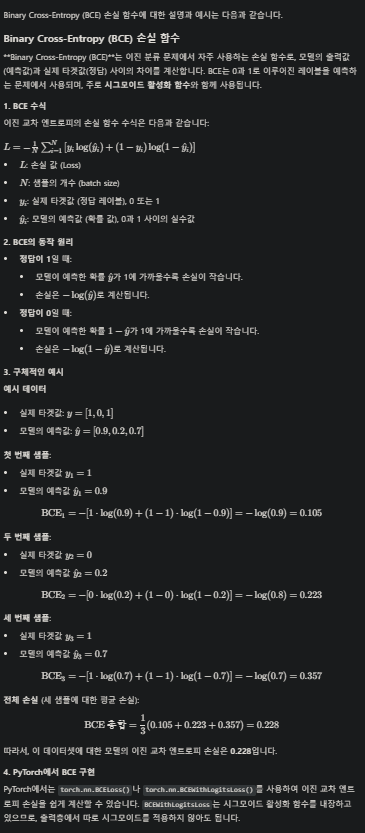
# Binary Cross-Entropy (BCE) 설명 및 예시

**Binary Cross-Entropy (BCE)**는 이진 분류 문제에서 자주 사용하는 손실 함수로, 모델의 출력값(예측값)과 실제 타겟값(정답) 사이의 차이를 계산하는 데 사용됩니다. BCE는 0과 1로 이루어진 레이블을 예측하는 문제에서 사용되며, 주로 **시그모이드 활성화 함수**와 함께 사용됩니다.

---

## 1. BCE 수식

이진 교차 엔트로피의 손실 함수 수식은 다음과 같습니다:

$L = - (1/N) * Σ [ y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i) ]$

- **L**: 손실 값 (Loss)
- **N**: 샘플의 개수 (batch size)
- **y_i**: 실제 타겟값 (정답 레이블), 0 또는 1
- **ŷ_i**: 모델의 예측값 (확률 값), 0과 1 사이의 실수값

---

## 2. BCE의 동작 원리

- **정답이 1**일 때:
  - 모델이 예측한 확률 ŷ가 1에 가까울수록 손실이 작습니다.
  - 손실은 `- log(ŷ)`로 계산됩니다.

- **정답이 0**일 때:
  - 모델이 예측한 확률 1 - ŷ가 1에 가까울수록 손실이 작습니다.
  - 손실은 `- log(1 - ŷ)`로 계산됩니다.

따라서, BCE는 모델이 정답과 멀리 떨어진 예측을 할수록 손실이 증가하고, 정답에 가까운 예측을 할수록 손실이 감소합니다.

---

## 3. 구체적인 예시

### 예시 데이터
- 실제 타겟값: y = [1, 0, 1]
- 모델의 예측값: ŷ = [0.9, 0.2, 0.7]

**첫 번째 샘플**:
- 실제 타겟값 y_1 = 1
- 모델의 예측값 ŷ_1 = 0.9

$BCE_1 = -[1 * log(0.9) + (1 - 1) * log(1 - 0.9)] = -log(0.9) = 0.105$

**두 번째 샘플**:
- 실제 타겟값 y_2 = 0
- 모델의 예측값 ŷ_2 = 0.2

$BCE_2 = -[0 * log(0.2) + (1 - 0) * log(1 - 0.2)] = -log(0.8) = 0.223$

**세 번째 샘플**:
- 실제 타겟값 y_3 = 1
- 모델의 예측값 ŷ_3 = 0.7

$BCE_3 = -[1 * log(0.7) + (1 - 1) * log(1 - 0.7)] = -log(0.7) = 0.357$

**전체 손실** (세 샘플에 대한 평균 손실):

BCE 총합 = (1/3) * (0.105 + 0.223 + 0.357) = 0.228

따라서, 이 데이터셋에 대한 모델의 이진 교차 엔트로피 손실은 **0.228**입니다.

---

## 4. PyTorch에서 BCE 구현

PyTorch에서는 `torch.nn.BCELoss()`나 `torch.nn.BCEWithLogitsLoss()`를 사용하여 이진 교차 엔트로피 손실을 쉽게 계산할 수 있습니다. `BCEWithLogitsLoss`는 시그모이드 활성화 함수를 내장하고 있으므로, 출력층에서 따로 시그모이드를 적용하지 않아도 됩니다.

### 코드 예시

```python
import torch
import torch.nn as nn

# 실제 타겟값 (정답 레이블)
y_true = torch.tensor([1, 0, 1], dtype=torch.float32)

# 모델의 예측값 (확률 값)
y_pred = torch.tensor([0.9, 0.2, 0.7], dtype=torch.float32)

# BCE 손실 함수 정의
criterion = nn.BCELoss()

# BCE 손실 계산
loss = criterion(y_pred, y_true)

print(f"BCE Loss: {loss.item():.4f}")


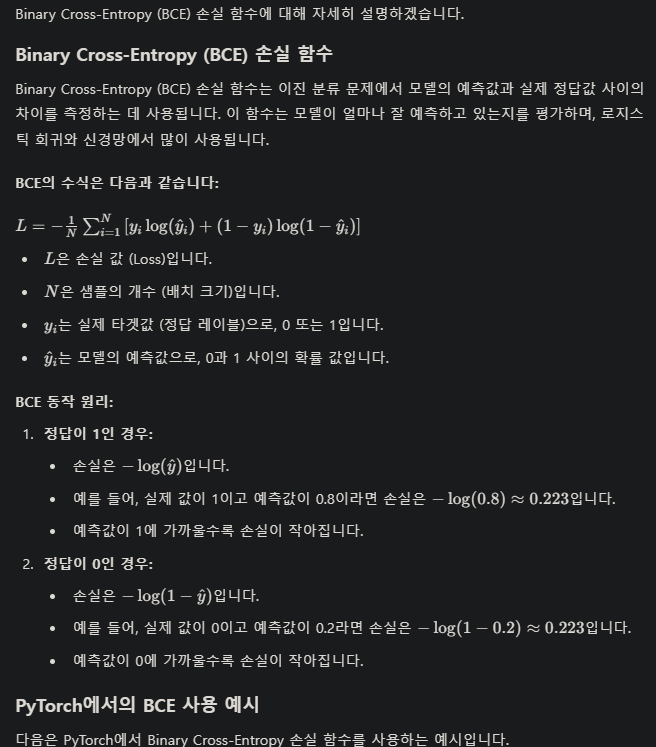

In [119]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device # 장치 문자열

'cuda'

In [120]:
Linear_model = Linear_Net(train_ft.shape[1]).to(device) # 모델 객체 생성후 gpu 로 장치 이동!!
Sigmoid_model = Sigmoid_Net(train_ft.shape[1]).to(device) # 모델 객체 생성후 gpu 로 장치 이동!!

In [91]:
optimizer = torch.optim.Adam(model.parameters() ,lr=0.001) 
# 옵티마이저 객체 생성, 모댈 가중치를 가지고 있음

## 학습 및 테스트 loop 구현

In [121]:
train_dt = TitanicDataset(train_ft, target)
train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)
train_dl

- 예측

In [122]:
test_dt = TitanicDataset(test_ft)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size, shuffle=False)

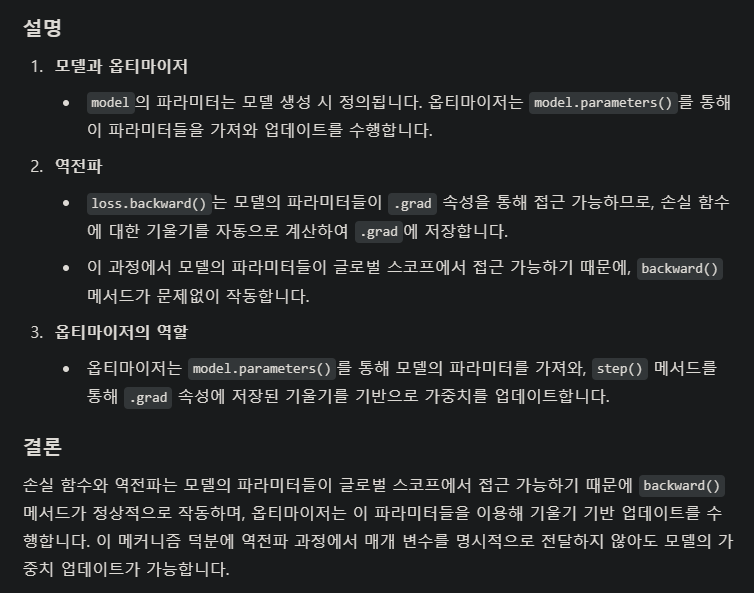

In [86]:
batch_size = 6 # 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 객체
device = "cuda" if torch.cuda.is_available() else "cpu" # 장치 문자열
epochs = 10 # 최대 가능한 에폭수
n_splits = 5 # cv 에서 K 개수
n_features = train_ft.shape[1] # 피처 개수
model = Sq_block_net(n_features).to(device)
optimizer = torch.optim.Adam( model.parameters() )


from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [87]:
break_point=True
for i, (tri, vai) in enumerate( cv.split(train_ft) ):
    # 학습용 데이터
    x_train = train_ft[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train_ft[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = TitanicDataset(x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = TitanicDataset(x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)
    if break_point==True:
            break

In [120]:
epoches=[]
break_point=True
count=0
def train_loop(dataloader,model,loss_fn,optimizer,device):
    global count
    epoch_loss=0
    model.train()
    
    for batch in dataloader:
        pred=model(batch['x'].to(device))
        loss=loss_fn(pred,batch['y'].to(device))
        
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
        print(f'''x와 y를 가지는 하나의 딕션널리 세트 : {len(batch)},
              이것의 오차값 : {loss},
              오차에 접근 : {loss.item()}''')

        epoch_loss+=loss.item()
        epoches.append(epoch_loss)
        # print(f"학습에 사용된 배치 샘플 수: {len(batch['x'])}, 데이터 로더의 길이 {len(dataloader)} epoch_loss: {epoch_loss}")
        # 데이터로더의 길이는 배치사이즈에 따라 달라짐
        count += 1 
        
        if break_point==False:
            break
            

    epoch_loss/=len(dataloader)
    
    return epoch_loss

In [121]:
dt=Dataset(train_ft,target)
dl=torch.utils.data.DataLoader(dt,shuffle=False,batch_size=5,drop_last=True)
next(iter(dl))

{'x': tensor([[0.8873, 0.0000, 0.0000, 0.0966, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
          0.0000],
         [0.4238, 0.0000, 0.0000, 0.0157, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000],
         [0.3611, 0.3750, 0.1111, 0.0430, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000],
         [0.2233, 0.1250, 0.1111, 0.0254, 0.5000, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000],
         [0.5991, 0.0000, 0.0000, 0.0518, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          1.0000]]),
 'y': tensor([[0.],
         [0.],
         [0.],
         [1.],
         [1.]])}

In [122]:
train_loop(dl,model,loss_fn,optimizer,device)

x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.40466371178627014,
              오차에 접근 : 0.40466371178627014
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.4317878782749176,
              오차에 접근 : 0.4317878782749176
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.48092594742774963,
              오차에 접근 : 0.48092594742774963
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.18085531890392303,
              오차에 접근 : 0.18085531890392303
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.7080177664756775,
              오차에 접근 : 0.7080177664756775
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.46834370493888855,
              오차에 접근 : 0.46834370493888855
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.38448309898376465,
              오차에 접근 : 0.38448309898376465
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.2525385320186615,
              오차에 접근 : 0.2525385320186615
x와 y를 가지는 하나의 딕션널리 세트 : 2,
              이것의 오차값 : 0.2545139491558075,
              오

0.4389633599037681

In [119]:
target.size,len(dl),len(dl)*5
# 데이터로더의 배치 사이즈가 5이기 때문에 총 갯수 // 5 만큼

(916, 183, 915)

In [123]:
count,epoches,len(epoches) # 6샘플의 오차값임

(183,
 [0.40466371178627014,
  0.8364515900611877,
  1.3173775374889374,
  1.4982328563928604,
  2.206250622868538,
  2.6745943278074265,
  3.059077426791191,
  3.3116159588098526,
  3.56612990796566,
  3.9612425714731216,
  4.465954378247261,
  4.6616155952215195,
  4.871609658002853,
  5.113229528069496,
  5.481181964278221,
  5.904506608843803,
  6.305524334311485,
  6.896177694201469,
  7.4176862090826035,
  8.08184264600277,
  8.286458864808083,
  8.925984874367714,
  9.926577344536781,
  10.097281694412231,
  10.311138227581978,
  10.848561063408852,
  11.046180471777916,
  11.550457820296288,
  12.19872759282589,
  13.144192203879356,
  13.371387973427773,
  13.679315701127052,
  14.3716392070055,
  14.651470139622688,
  14.867702960968018,
  15.123600423336029,
  15.597555488348007,
  16.230975419282913,
  16.773472517728806,
  17.013880506157875,
  17.276638194918633,
  17.599445566534996,
  18.042255148291588,
  18.228286772966385,
  18.66431850194931,
  19.358351409435272,
 

In [124]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    model.train()
    epoch_loss = 0.0

    for batch in dataloader:
        # 배치 데이터를 장치로 이동
        x, y = batch['x'].to(device), batch['y'].to(device)
        
        # 모델 예측
        pred = model(x)
        
        # 손실 계산
        loss = loss_fn(pred, y)
        
        # 옵티마이저 초기화
        optimizer.zero_grad()
        
        # 역전파 및 최적화
        loss.backward()
        optimizer.step()
        
        # 손실 값 누적
        epoch_loss += loss.item()
    
    # 평균 손실 계산
    epoch_loss /= len(dataloader)
    
    return epoch_loss


In [125]:
@torch.no_grad()
def test_loop(dataloader,model,loss_fn,device):
    model.eval()
    epoch_loss=0
    act_func=torch.nn.Sigmoid()
    pred_list=[]
    
    for batch in dataloader:
        pred=model(batch['x'].to(device))
        
        if batch.get('y') is True:
            loss=loss_fn(pred,batch['y'].to(device))
            epoch_loss+=loss.item()
            
        pred=act_func(pred).to("cpu").numpy() 
        pred_list.append(pred)
        
    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list) # 정답을 하나로 합쳐줌
    #print(len(pred_list),pred)
    
    return epoch_loss, pred

In [126]:
a=[1,2,30]
a.append([1,2,3])
a

[1, 2, 30, [1, 2, 3]]

In [129]:
import numpy as np

a = np.array([1, 2, 30]).reshape(-1, 1)
b = np.array([1, 2, 30]).reshape(-1, 1)

# 올바른 np.concatenate 사용법
pred = np.concatenate((a, b), axis=0)  # axis=0으로 수직 결합 (행 추가)
print(pred)


[[ 1]
 [ 2]
 [30]
 [ 1]
 [ 2]
 [30]]


In [130]:
test_loop(train_dl,model,loss_fn,device)

(0.0,
 array([[0.15737575],
        [0.127892  ],
        [0.13627318],
        [0.14061733],
        [0.23842576],
        [0.07203294],
        [0.44924134],
        [0.20403281],
        [0.13702758],
        [0.1333179 ],
        [0.3273794 ],
        [0.13700056],
        [0.16269915],
        [0.15857896],
        [0.2486338 ],
        [0.4507781 ],
        [0.15390117],
        [0.45433453],
        [0.25841334],
        [0.24670063],
        [0.31699944],
        [0.29928422],
        [0.07871462],
        [0.1961656 ],
        [0.13701978],
        [0.13607211],
        [0.45714992],
        [0.16599508],
        [0.13579334],
        [0.1409431 ],
        [0.12244824],
        [0.22459349],
        [0.49083462],
        [0.24957925],
        [0.31770766],
        [0.3104017 ],
        [0.07871462],
        [0.13883065],
        [0.26030284],
        [0.14311117],
        [0.14366785],
        [0.24289021],
        [0.31770766],
        [0.15775986],
        [0.17072883],
    

In [131]:
import numpy as np
import torch

@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    model.eval()  # 모델을 평가 모드로 설정
    epoch_loss = 0.0
    act_func = torch.nn.Sigmoid()
    pred_list = []

    for batch in dataloader:
        x = batch['x'].to(device)
        y = batch.get('y')
        
        # 모델 예측
        pred = model(x)
        
        # y가 존재할 경우 손실 계산
        if y is not None:
            y = y.to(device)
            loss = loss_fn(pred, y)
            epoch_loss += loss.item()
        
        # 예측에 Sigmoid 활성화 함수 적용 및 NumPy 배열로 변환
        pred = act_func(pred).cpu().numpy()
        pred_list.append(pred)
    
    # 평균 손실 계산
    epoch_loss /= len(dataloader) if len(dataloader) > 0 else 1
    
    # 모든 배치의 예측 결과를 결합
    preds = np.concatenate(pred_list, axis=0)
    
    return epoch_loss, preds


In [132]:
batch_size = 32 # 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 객체
device = "cuda" if torch.cuda.is_available() else "cpu" # 장치 문자열
epochs = 100 # 최대 가능한 에폭수
n_splits = 5 # cv 에서 K 개수
n_features = train_ft.shape[1] # 피처 개수

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [133]:
train_ft,target

(array([[0.88726043, 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.42377552, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.36114243, 0.375     , 0.11111111, ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.44882876, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.473882  , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.23587624, 0.125     , 0.11111111, ..., 0.        , 0.        ,
         1.        ]]),
 array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1

In [134]:
import os 
from tqdm.notebook import tqdm
is_holdout = False

#os.makedirs('C:\\NLP_Papers_Review\\03_Deep_Learning\\weight\\titanic')
save_dir = 'C:\\study\\03_Deep_Learning\\weight\\titanic'


best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_ft) ):
    # 학습용 데이터
    x_train = train_ft[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train_ft[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = TitanicDataset(x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = TitanicDataset(x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Sq_block_net(n_features).to(device)
    optimizer = torch.optim.Adam( model.parameters() )

    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(dataloader=train_dl, model=model, loss_fn=loss_fn, optimizer=optimizer, device=device)
        valid_loss, pred= test_loop(dataloader=valid_dl, model=model, loss_fn=loss_fn, device=device)

        score = roc_auc_score(y_valid, pred)

        #print(train_loss, valid_loss, score)
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), os.path.join(save_dir, f"model_titanic_{i}.pth")) # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break

    print(f"{i}번째 폴드 최고 AUC: {best_score}")
    best_score_list.append(best_score)
    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 AUC: 0.8272556390977445


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 AUC: 0.7296057525415324


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 AUC: 0.668264180672269


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 AUC: 0.8217535661583867


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 AUC: 0.8455078645694482


In [138]:
import os
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score
import torch

is_holdout = False
save_dir = 'C:\\study\\03_Deep_Learning\\weight\\titanic'
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성

best_score_list = []

for i, (train_idx, valid_idx) in enumerate(cv.split(train_ft)):
    # 데이터 분할
    x_train, y_train = train_ft[train_idx], target[train_idx]
    x_valid, y_valid = train_ft[valid_idx], target[valid_idx]

    # 데이터로더 생성
    train_dl = torch.utils.data.DataLoader(
        TitanicDataset(x_train, y_train), batch_size=batch_size, shuffle=True
    )
    valid_dl = torch.utils.data.DataLoader(
        TitanicDataset(x_valid, y_valid), batch_size=batch_size, shuffle=False
    )

    # 모델, 옵티마이저 설정
    model = Net(n_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())
    
    best_score, patience = 0, 0
    
    for epoch in tqdm(range(epochs), desc=f"Fold {i+1}"):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        
        score = roc_auc_score(y_valid, pred)
        
        if score > best_score:
            best_score = score
            patience = 0
            torch.save(model.state_dict(), os.path.join(save_dir, f"model_titanic_{i}.pth"))
        else:
            patience += 1
        
        if patience >= 20:
            break

    print(f"Fold {i+1} - Best AUC: {best_score:.4f}")
    best_score_list.append(best_score)

    if is_holdout:
        break


Fold 1:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 1 - Best AUC: 0.9112


Fold 2:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 2 - Best AUC: 0.9504


Fold 3:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 3 - Best AUC: 0.8812


Fold 4:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 4 - Best AUC: 0.8800


Fold 5:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 5 - Best AUC: 0.9106


In [102]:
test_dt = TitanicDataset(test_ft)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

pred_list=[]
for i in range(n_splits):
    model=Net(n_features).to(device)
    state_dict=torch.load(os.path.join(save_dir, f"model_titanic_{i}.pth"))
    model.load_state_dict(state_dict)
    _, pred = test_loop(test_dl, model, loss_fn, device)
    pred_list.append(pred)

In [103]:
np.array(pred_list).shape #5개의 학습된 모델에서 393개의 예측값을 뱉음

(5, 393, 1)

In [212]:
np.mean(pred_list,axis=1).shape

(5, 1)

In [104]:
pred = np.mean(pred_list,axis=0) 
np.where(pred > 0.5, 1, 0)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [105]:
np.array(list(map(lambda p: 1 if p > 0.5 else 0, pred)))

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,